# Bayesian analysis and modern machine learning algorithms applied for soil and rock probabilistic characterization 

## Introduction

Modern programming languages made easier the use of statistical analysis of large amount of data. 
The Bayesian analysis is helpful to update knowledge of something.
Is particularly indicated when we have to deal with classification. 
This is why it is helpful when appled to geotechnical material.
The instrument we are going to use is pandas packages under python code for what concern the data manipulation.
The sklearn package and in particular SNN classification will be used in order to verify the omogeneity of the selected sample with respect to the other material obtained from other sample.
Successively we are going to use the package pcm3 for the bayesian analysis
An online database by means of Mysql open source will keep storage of the soil material and will be helpful for future analyis.
The criteria of storing data will be also the geografical area linked to climate and geological period, local atmosfere (lake, sea, desertic) and load history. This will be helpful to assimilate similar soil.



## Python packages to deal with data

We will make extensive use of Pandas packages to deal with data. This packages offer the peculiarity to communicate with a huge amount of data protocols like html, json, xls, db, csv and is constantly update to accomodate recent development like supporting the xxx format that is a development of the csv format but much faster and disk space optimization.
The following code show how this package will be use to upload data from the excel file.

In [450]:
import pandas as pd
# we set pandas options in order to enlarge the row/columns visualization
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
# import matplotlib for graphs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [26]:
xls = pd.ExcelFile('geotech1.xlsx')

In [27]:
sheetsls = xls.sheet_names
sheetsls

['Caratt_Compl']

In [247]:
df1 = pd.read_excel(xls, sheetsls[0])

Create a DataFrame by cleaning all missing data

In [340]:
df=df1.copy()
df.columns=df.columns+' '+df.iloc[0,:].astype('str')
df.columns = df.columns.str.replace('nan','')
df.columns = df.columns.str.replace(' 611','')
df.columns = df.columns.str.replace("'",'^')
df.columns = df.columns.str.replace("%",'[p]')
df.columns = df.columns.str.replace("j",'ϕ')
df.drop([0,1], axis='rows', inplace=True)
df.dropna(axis='columns', thresh=5, inplace=True)
df.dropna(axis='rows', thresh=9, inplace=True)

# Select the desired columns

df=df[['Zarr0,25 m','σ^v [kPa]', 'gwet ', 'wn ', 'wopt ', 'CaCo3 ',
       'Sr [p]', 'LL [p]', 'PI [p]', 'Ic ', 'OCROED [-]', 'OCRTX [-]',
       'e0 [-]', 'Cc [-]', 'Ce [-]', '(N1)60 ',
       'cTX ', 'ϕTX ', 'c^TX ', 'ϕ^TX ', 'Cu ', 'OCR ',
       'cDSS ', 'ϕDSS ', 'CU,VANE ', 'Ep1 Mpa', 'Pl Mpa', 'Em/Pl ', 'WL.1 ', 'PI.1 ',
       'Cu,Ucs ']]

# correct the columns name

df.columns = df.columns.str.replace(" ",'_')
df.columns = df.columns.str.replace('\[-\]$','')
df.columns = df.columns.str.replace('_$','')

# correct the column type and plot statistics

df=df.astype('float')
df.describe()


,"Zarr0,25_m",σ^v_[kPa],gwet,wn,wopt,CaCo3,Sr_[p],LL_[p],PI_[p],Ic,OCROED,OCRTX,e0,Cc,Ce,(N1)60,cTX,ϕTX,c^TX,ϕ^TX,Cu,OCR,cDSS,ϕDSS,"CU,VANE",Ep1_Mpa,Pl_Mpa,Em/Pl,WL.1,PI.1,"Cu,Ucs"
count,596.000000,596.000000,65.000000,148.000000,6.000000,10.000000,27.000000,136.000000,136.000000,66.000000,31.000000,26.000000,37.000000,32.000000,32.000000,268.000000,29.000000,29.000000,36.000000,36.000000,26.000000,26.000000,5.000000,5.000000,58.000000,42.000000,42.000000,42.000000,31.000000,31.000000,8.000000
mean,20.061242,227.917911,17.852769,32.136696,19.583333,30.817000,0.961852,73.522059,43.404412,0.709168,2.712903,3.571991,1.167946,0.450594,0.081656,15.062256,46.965517,17.172414,30.833333,24.777778,186.439666,3.571991,22.600000,13.600000,253.327586,13.766667,0.721905,28.477894,78.612903,46.709677,163.668750
std,13.811707,127.204534,0.979376,16.924352,1.734839,7.983576,0.043504,16.601636,13.290140,0.214630,1.259826,2.130319,0.233693,0.170711,0.032962,9.284723,28.031211,4.480665,24.961113,5.483019,73.251474,2.130319,16.682326,2.701851,134.300186,9.782679,0.545175,32.095831,13.169858,10.096843,68.002825
min,0.750000,13.500000,13.340000,0.270000,16.700000,20.000000,0.810000,31.000000,11.000000,-0.250000,1.000000,1.347558,0.623000,0.098000,0.001000,5.081337,5.000000,9.000000,0.000000,17.000000,68.744449,1.347558,5.000000,9.000000,23.000000,1.900000,0.150000,7.142857,58.000000,30.000000,38.950000
25%,8.500000,123.843750,17.460000,27.850000,18.775000,25.647500,0.950000,65.000000,34.000000,0.614560,2.000000,2.069353,0.991000,0.316000,0.066000,9.519735,23.000000,15.000000,10.000000,19.750000,122.822503,2.069353,17.000000,14.000000,151.000000,4.425000,0.200000,12.817391,70.000000,40.000000,133.225000
50%,17.625000,216.000000,17.900000,35.400000,20.500000,29.500000,0.970000,73.500000,43.500000,0.711982,2.500000,2.800998,1.179000,0.425500,0.086000,12.432293,45.000000,16.000000,25.000000,24.000000,202.969366,2.800998,18.000000,14.000000,241.000000,13.600000,0.655000,14.686275,78.000000,46.000000,160.050000
75%,29.000000,308.500000,18.420000,44.525000,20.500000,36.092500,0.995000,83.000000,51.000000,0.853235,3.050000,4.897160,1.337000,0.594500,0.101500,17.241599,68.000000,19.000000,50.000000,28.000000,232.352324,4.897160,23.000000,15.000000,324.250000,17.975000,1.250000,24.983333,87.000000,55.000000,216.887500
max,66.500000,609.750000,20.440000,57.200000,21.100000,42.000000,1.000000,109.000000,79.000000,1.212121,6.200000,10.490107,1.671000,0.831000,0.140000,67.681053,110.000000,29.000000,80.000000,37.000000,309.781238,10.490107,50.000000,16.000000,530.000000,43.500000,1.700000,166.470588,105.000000,65.000000,245.750000


From the above we notice that:
- Water content wn should be expressed in percentage but some data are not (min value 0.27) we will drop values < 1
- Sr should be expressed in percentage but is not (maximum value is 1)
- OCR and OCRTx are the same column we will replace the column OCR by the mean of the 2

The describe function permit to evaluate only data that permits statistics, we will then reduce the dataframe to such columns

In [341]:
# correct wn values 
df['wn']=df['wn'].apply(lambda x: x if (x>1) else x*100)

# joint similar data
df['OCR'] = df[["OCROED",'OCRTX']].mean(axis=1)
df['LL'] = df[["LL_[p]",'WL.1']].mean(axis=1)
df['IP'] = df[["PI_[p]",'PI.1']].mean(axis=1)
df=df.drop(columns=["PI_[p]",'PI.1',"LL_[p]",'WL.1'])
df=df.drop(columns=["OCROED",'OCRTX'])

In [342]:
df2=df[df.describe().columns.tolist()]

In [343]:
df2.columns

Index(['Zarr0,25_m', 'σ^v_[kPa]', 'gwet', 'wn', 'wopt', 'CaCo3', 'Sr_[p]', 'Ic', 'e0', 'Cc', 'Ce', '(N1)60', 'cTX', 'ϕTX', 'c^TX', 'ϕ^TX', 'Cu', 'OCR', 'cDSS', 'ϕDSS', 'CU,VANE', 'Ep1_Mpa', 'Pl_Mpa', 'Em/Pl', 'Cu,Ucs', 'LL', 'IP'], dtype='object')

- Rename the columns with suitable names
- Drop columns that are not relevant and drop row that have less than 3 values

In [345]:
df2.columns=['Zarr0,25_m', 'σ^v_[kPa]', 'gwet', 'wn', 'wopt', 'CaCo3', 'Sr', 'Ic', 'e0', 'Cc', 'Ce', '(N1)60', 'c-TX', 'ϕ-Tx', 'c^Tx', 'ϕ^Tx', 'Cu-Tx', 'OCR', 'c-Dss', 'ϕ-Dss', 'CU-Vane', 'Ep1_[Mpa]', 'Pl_[Mpa]', 'Em/Pl', 'Cu-Ucs', 'LL', 'PI']
df2.dropna(axis='rows', thresh=3, inplace=True)

In [347]:
df2['count']=df.count(axis=1)
df2.sort_values('count', ascending=False)

,"Zarr0,25_m",σ^v_[kPa],gwet,wn,wopt,CaCo3,Sr,Ic,e0,Cc,Ce,(N1)60,c-TX,ϕ-Tx,c^Tx,ϕ^Tx,Cu-Tx,OCR,c-Dss,ϕ-Dss,CU-Vane,Ep1_[Mpa],Pl_[Mpa],Em/Pl,Cu-Ucs,LL,PI,count
62,4.75,82.3500,17.50,32.6,NaN,NaN,NaN,1.058621,1.084,0.425,0.101,NaN,NaN,NaN,NaN,NaN,NaN,6.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,58.0,12
632,16.75,223.2500,17.11,56.3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,110.0,14.0,80.0,28.0,156.454585,2.015677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
630,10.75,178.6250,18.38,39.4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,40.0,22.0,30.0,30.0,157.558352,2.687194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
532,46.75,447.6875,18.20,32.9,NaN,NaN,NaN,0.281818,1.008,0.321,0.013,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,11.0,12
531,41.00,403.8125,16.82,55.1,NaN,NaN,NaN,0.678723,1.536,0.627,0.140,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,47.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,32.00,300.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.008622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
294,29.00,277.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.485971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
293,27.00,262.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.894366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
292,25.00,247.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.591483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


The dataframe is now ordered. The next step is a population routine that will replace all NaN values by regressed values.
Let's order the parameters by count. This will allow us to decide which parameters are going to lead the populate routine.

In [348]:
dfd=df2.describe()
dfdt = dfd.transpose()
dfdt.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
"Zarr0,25_m",588.0,20.176871,13.829423,0.750000,8.500000,18.000000,29.000000,66.500000
σ^v_[kPa],588.0,229.408291,127.134431,13.500000,125.750000,219.000000,310.000000,609.750000
count,588.0,5.448980,2.426946,4.000000,4.000000,4.000000,6.000000,12.000000
(N1)60,268.0,15.062256,9.284723,5.081337,9.519735,12.432293,17.241599,67.681053
PI,167.0,44.017964,12.795647,11.000000,35.000000,44.000000,51.000000,79.000000
LL,167.0,74.467066,16.106866,31.000000,65.500000,74.000000,83.000000,109.000000
wn,148.0,39.515541,8.598843,20.600000,32.900000,38.250000,45.350000,57.300000
Ic,66.0,0.709168,0.214630,-0.250000,0.614560,0.711982,0.853235,1.212121
gwet,65.0,17.852769,0.979376,13.340000,17.460000,17.900000,18.420000,20.440000
CU-Vane,58.0,253.327586,134.300186,23.000000,151.000000,241.000000,324.250000,530.000000


Create a dataframe 'dfo' that is ordered according to the most relevant parameters

In [349]:
dfo = df[dfdt.sort_values('count', ascending=False).index.tolist()].sort_values('count',ascending=False)
dfo

,"Zarr0,25_m",σ^v_[kPa],count,(N1)60,PI,LL,wn,Ic,gwet,CU-Vane,OCR,Em/Pl,Pl_[Mpa],Ep1_[Mpa],e0,ϕ^Tx,c^Tx,Ce,Cc,ϕ-Tx,c-TX,Sr,Cu-Tx,CaCo3,Cu-Ucs,wopt,c-Dss,ϕ-Dss
62,4.75,82.3500,11,NaN,58.0,94.0,32.6,1.058621,17.50,NaN,6.200000,NaN,NaN,NaN,1.084,NaN,NaN,0.101,0.425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,16.75,223.2500,11,NaN,NaN,NaN,56.3,NaN,17.11,NaN,2.015677,NaN,NaN,NaN,NaN,28.0,80.0,NaN,NaN,14.0,110.0,1.0,156.454585,NaN,NaN,NaN,NaN,NaN
630,10.75,178.6250,11,NaN,NaN,NaN,39.4,NaN,18.38,NaN,2.687194,NaN,NaN,NaN,NaN,30.0,30.0,NaN,NaN,22.0,40.0,1.0,157.558352,NaN,NaN,NaN,NaN,NaN
532,46.75,447.6875,11,NaN,11.0,36.0,32.9,0.281818,18.20,NaN,1.300000,NaN,NaN,NaN,1.008,NaN,NaN,0.013,0.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,41.00,403.8125,11,NaN,47.0,87.0,55.1,0.678723,16.82,NaN,1.600000,NaN,NaN,NaN,1.536,NaN,NaN,0.140,0.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,32.00,300.0000,3,12.008622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,29.00,277.5000,3,12.485971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,27.00,262.5000,3,15.894366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,25.00,247.5000,3,12.591483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
dfg=dfo.groupby('Zarr0,25_m').mean()
print('The shape of the new dataframe is:',dfg.shape)
dfg

The shape of the new dataframe is: (153, 27)


,σ^v_[kPa],count,(N1)60,PI,LL,wn,Ic,gwet,CU-Vane,OCR,Em/Pl,Pl_[Mpa],Ep1_[Mpa],e0,ϕ^Tx,c^Tx,Ce,Cc,ϕ-Tx,c-TX,Sr,Cu-Tx,CaCo3,Cu-Ucs,wopt,c-Dss,ϕ-Dss
"Zarr0,25_m",,,,,,,,,,,,,,,,,,,,,,,,,,,
0.75,13.500000,6.000000,NaN,34.000000,57.000000,28.000000,0.852941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.50,27.000000,3.000000,8.500000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5,NaN,NaN
1.75,31.500000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.00,34.333333,3.083333,27.329827,60.000000,92.000000,30.000000,NaN,NaN,241.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN
2.50,44.742857,3.571429,28.791405,46.000000,77.000000,27.400000,NaN,19.0600,241.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.75,42.000000,5.000000,NaN,44.500000,69.000000,27.000000,0.931818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.00,54.000000,3.000000,23.182810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5,NaN,NaN
3.25,57.825000,5.500000,14.244567,40.000000,67.500000,NaN,NaN,NaN,NaN,NaN,9.657468,0.993333,9.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.50,59.183333,4.666667,26.413204,41.000000,70.000000,35.200000,NaN,17.7525,NaN,5.730159,NaN,NaN,NaN,NaN,19.5,31.25,NaN,NaN,9.0,50.0,0.93,68.744449,NaN,NaN,NaN,50.0,9.0


## Filling missing data by interpolation

One of the possibility to populate missing data is by means of interpolations. SInce we have lots of missing data we are obliged to start by using an unsupervised method of filling. Wi will do this for the following paramters:

- Atterberg Limits (LL,IP)
- Water content


In [388]:
dfg['PI'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
dfg['LL'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
dfg['wn'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
dfg.head()

,σ^v_[kPa],count,(N1)60,PI,LL,wn,Ic,gwet,CU-Vane,OCR,Em/Pl,Pl_[Mpa],Ep1_[Mpa],e0,ϕ^Tx,c^Tx,Ce,Cc,ϕ-Tx,c-TX,Sr,Cu-Tx,CaCo3,Cu-Ucs,wopt,c-Dss,ϕ-Dss,(N1)60_R
"Zarr0,25_m",,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.75,13.500000,6.000000,NaN,34.000000,57.000000,28.0,0.852941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.886468
1.50,27.000000,3.000000,8.500000,42.666667,68.666667,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5,NaN,NaN,8.500000
1.75,31.500000,3.000000,NaN,51.333333,80.333333,30.0,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.00,34.333333,3.083333,27.329827,60.000000,92.000000,30.0,NaN,NaN,241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,27.329827
2.50,44.742857,3.571429,28.791405,46.000000,77.000000,27.4,NaN,19.06,241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.791405


## Final dataframe setting up

The final dataframe will be based on:

- Insitu stress s'v
- Atterberg Limits (LL,IP) 
- Water content
- Corrected Nspt --> (N1)60
- Undrained shear strength from Triaxial Test
- Undrained shear strength from Vane Test
- Limit pressure from pressuremeter

In [414]:
dfg=dfg[['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn','CU-Vane','Pl_[Mpa]','Cu-Tx']]

## Fill missing values of NSTP by regression procedures

We know that the SPT are directly linked with undrained resistance and that this one is also directly linked with Atterberg Limits and water content. We will therefore fill missing (N1)60 values by regression.
First we need to check if there are lines that are filled with the wanted parameters:

- The regressand : (N1)60
- The regressors: 'σ^v_[kPa]', 'PI', 'LL', 'wn'

We find that in 36 lines we have full data to perform such regression.

In [389]:
dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn']).shape

(84, 28)

In [369]:
from sklearn.linear_model           import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [390]:
# create subdatabase without Nan

dfg_train=dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn'])

X_train = np.array(dfg_train[['σ^v_[kPa]', 'PI', 'LL', 'wn']])
y_train = np.array(dfg_train['(N1)60'])

In [391]:
model = LinearRegression().fit(X_train, y_train)

# Step 4: Get results
r_sq = model.score(X_train, y_train)
intercept, coefficients = model.intercept_, model.coef_

sptc0 = intercept
sptc1 = coefficients[0]
sptc2 = coefficients[1]
sptc3 = coefficients[2]
sptc4 = coefficients[3]

print('The intercept is:', intercept)
print('The coefficients are:', coefficients)

The intercept is: 24.325128124343376
The coefficients are: [-0.00324476  0.15158914 -0.12815208 -0.09884295]


In [395]:
dfg['(N1)60']= dfg.apply(
    lambda row: 
            sptc1 * row['σ^v_[kPa]'] + sptc2 * row.PI + sptc3 * row.LL + sptc4 * row.wn + sptc0 
            if np.isnan(row['(N1)60']) else row['(N1)60'], axis=1)

## Fill missing values of Vane Undrained shear resistance (cu) by regression procedures

We know that the Cu is directly linked with Atterberg Limits and water content. We also know that for clayey soil is linked with SPT. We will therefore fill missing Cu-Vane values by regression. First we need to check if there are lines that are filled with the wanted parameters:

The regressand : Cu-TX
The regressors: 'σ^v_[kPa]', 'PI', 'LL', 'wn'
We find that in 36 lines we have full data to perform such regression.

In [396]:
dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn','CU-Vane']).shape

(46, 28)

In [397]:
# create subdatabase without Nan

dfg_train=dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn','CU-Vane'])

X_train = np.array(dfg_train[['σ^v_[kPa]', 'PI', 'LL', 'wn','(N1)60']])
y_train = np.array(dfg_train['CU-Vane'])

In [400]:
model = LinearRegression().fit(X_train, y_train)

# Step 4: Get results
r_sq = model.score(X_train, y_train)
intercept, coefficients = model.intercept_, model.coef_

vanec0 = intercept
vanec1 = coefficients[0]
vanec2 = coefficients[1]
vanec3 = coefficients[2]
vanec4 = coefficients[3]
vanec5 = coefficients[4]

print('The intercept is:', intercept)
print('The coefficients are:', coefficients)

The intercept is: 126.70319610483855
The coefficients are: [ 0.33029828 -8.62240232  5.96322843 -1.2023325   1.69583016]


In [401]:
dfg['CU-Vane']= dfg.apply(
    lambda row: 
            vanec1 * row['σ^v_[kPa]'] + vanec2 * row.PI + vanec3 * row.LL + vanec4 * row.wn + vanec5 * row['(N1)60'] + vanec0 
            if np.isnan(row['CU-Vane']) else row['CU-Vane'], axis=1)

## Fill missing values Limit Pressure by regression procedures

Limit Presure is directly linked with Undrained Shear Resistance wich is linked with Atterberg Limits and water content. We also know that for clayey soil is linked with SPT. We will therefore fill missing Cu-Vane values by regression. First we need to check if there are lines that are filled with the wanted parameters:

The regressand : Pl_[Mpa]
The regressors: 'σ^v_[kPa]', 'PI', 'LL', 'wn', Cu-TX, CU-Vane
We find that in 36 lines we have full data to perform such regression.

In [402]:
dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn','CU-Vane','Pl_[Mpa]']).shape

(27, 28)

In [403]:
# create subdatabase without Nan

dfg_train=dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn','CU-Vane','Pl_[Mpa]'])

X_train = np.array(dfg_train[['σ^v_[kPa]', 'PI', 'LL', 'wn','(N1)60','CU-Vane']])
y_train = np.array(dfg_train['Pl_[Mpa]'])

In [418]:
model = LinearRegression().fit(X_train, y_train)

# Step 4: Get results
r_sq = model.score(X_train, y_train)
intercept, coefficients = model.intercept_, model.coef_

plc0 = intercept
plc1 = coefficients[0]
plc2 = coefficients[1]
plc3 = coefficients[2]
plc4 = coefficients[3]
plc5 = coefficients[4]
plc6 = coefficients[5]

print('The intercept is:', intercept)
print('The coefficients are:', coefficients)

The intercept is: 1.1163211705610268
The coefficients are: [-0.00092829  0.09360751 -0.07601579  0.01832922  0.04537081 -0.00029465]


In [441]:
dfg["Pl_[Mpa]"]= dfg.apply(
    lambda row: 
            plc1 * row['σ^v_[kPa]'] + plc2 * row.PI + plc3 * row.LL + plc4 * row.wn + plc5 * row['(N1)60'] + plc6 * row['CU-Vane'] + plc0  
            if np.isnan(row["Pl_[Mpa]"]) else row["Pl_[Mpa]"], axis=1)

C:\Users\Fabrizio\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Fill missing values Triaxial Cu by regression procedures

Triaxial Test Cu is directly linked with Vane test Undrained Shear Resistance and Limit pressures wich are linked with Atterberg Limits and water content. We also know that for clayey soil is linked with SPT. We will therefore fill missing Cu-Vane values by regression. First we need to check if there are lines that are filled with the wanted parameters:

The regressand : Cu-Tx
The regressors: 'σ^v_[kPa]', 'PI', 'LL', 'wn', Cu-TX, CU-Vane, Pl_[Mpa]
We find that in 36 lines we have full data to perform such regression.

In [442]:
dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn','CU-Vane','Pl_[Mpa]','Cu-Tx']).shape

(26, 8)

In [445]:
# create subdatabase without Nan

dfg_train=dfg.dropna(subset=['σ^v_[kPa]', '(N1)60', 'PI', 'LL', 'wn','CU-Vane','Pl_[Mpa]','Cu-Tx'])

X_train = np.array(dfg_train[['σ^v_[kPa]', 'PI', 'LL', 'wn','(N1)60','CU-Vane','Pl_[Mpa]']])
y_train = np.array(dfg_train['Cu-Tx'])

In [446]:
model = LinearRegression().fit(X_train, y_train)

# Step 4: Get results
r_sq = model.score(X_train, y_train)
intercept, coefficients = model.intercept_, model.coef_

plc0 = intercept
plc1 = coefficients[0]
plc2 = coefficients[1]
plc3 = coefficients[2]
plc4 = coefficients[3]
plc5 = coefficients[4]
plc6 = coefficients[5]
plc7 = coefficients[6]

print('The intercept is:', intercept)
print('The coefficients are:', coefficients)

The intercept is: 163.92418038146462
The coefficients are: [ 0.63707711  4.60660853 -3.80838256  0.25288526 -0.03397655 -0.19494553
  0.72327004]


In [447]:
dfg["Cu-Tx"]= dfg.apply(
    lambda row: 
            plc1 * row['σ^v_[kPa]'] + plc2 * row.PI + plc3 * row.LL + plc4 * row.wn + plc5 * row['(N1)60'] + plc6 * row['CU-Vane']+ plc6 * row['Pl_[Mpa]'] + plc0  
            if np.isnan(row["Cu-Tx"]) else row["Cu-Tx"], axis=1)

C:\Users\Fabrizio\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [451]:
dfg

,σ^v_[kPa],(N1)60,PI,LL,wn,CU-Vane,Pl_[Mpa],Cu-Tx
"Zarr0,25_m",,,,,,,,
0.75,13.500000,19.363083,34.000000,57.000000,28.0,177.075755,1.293106,83.722290
1.50,27.000000,8.500000,42.666667,68.666667,30.0,155.551684,0.755122,92.991401
1.75,31.500000,18.744321,51.333333,80.333333,30.0,90.000000,1.159467,103.703175
2.00,34.333333,27.329827,60.000000,92.000000,30.0,241.000000,1.426290,71.220541
2.50,44.742857,28.791405,46.000000,77.000000,27.4,241.000000,1.265016,69.809708
...,...,...,...,...,...,...,...,...
59.50,555.750000,14.818291,47.000000,81.000000,45.0,359.059398,0.250000,366.841997
60.00,555.000000,14.820724,47.000000,81.000000,45.0,358.815801,0.230000,366.415494
61.50,572.250000,20.701967,47.000000,81.000000,45.0,374.487035,0.481116,374.101259


Text(0.5, 1.0, 'paramters vs depth')

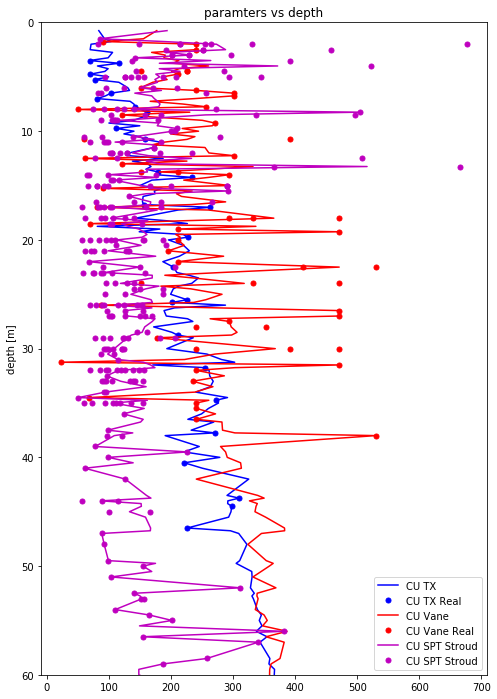

In [477]:
plt.figure(figsize=(8,12))
plt.plot( dfg['Cu-Tx'],dfg.index, 'b-', label='CU TX')
plt.plot( dfo['Cu-Tx'],dfo['Zarr0,25_m'], 'b.', label='CU TX Real',markersize=10)
plt.plot( dfg['CU-Vane'],dfg.index, 'r-', label='CU Vane')
plt.plot( dfo['CU-Vane'],dfo['Zarr0,25_m'], 'r.', label='CU Vane Real',markersize=10)
plt.plot( dfg['(N1)60']*10,dfg.index, 'm-', label='CU SPT Stroud')
plt.plot( dfo['(N1)60']*10,dfo['Zarr0,25_m'], 'm.', label='CU SPT Stroud',markersize=10)
plt.ylim(60,0); plt.ylabel('depth [m]'); plt.legend(); plt.title('paramters vs depth')

In [470]:
dfo

,"Zarr0,25_m",σ^v_[kPa],count,(N1)60,PI,LL,wn,Ic,gwet,CU-Vane,OCR,Em/Pl,Pl_[Mpa],Ep1_[Mpa],e0,ϕ^Tx,c^Tx,Ce,Cc,ϕ-Tx,c-TX,Sr,Cu-Tx,CaCo3,Cu-Ucs,wopt,c-Dss,ϕ-Dss
62,4.75,82.3500,11,NaN,58.0,94.0,32.6,1.058621,17.50,NaN,6.200000,NaN,NaN,NaN,1.084,NaN,NaN,0.101,0.425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,16.75,223.2500,11,NaN,NaN,NaN,56.3,NaN,17.11,NaN,2.015677,NaN,NaN,NaN,NaN,28.0,80.0,NaN,NaN,14.0,110.0,1.0,156.454585,NaN,NaN,NaN,NaN,NaN
630,10.75,178.6250,11,NaN,NaN,NaN,39.4,NaN,18.38,NaN,2.687194,NaN,NaN,NaN,NaN,30.0,30.0,NaN,NaN,22.0,40.0,1.0,157.558352,NaN,NaN,NaN,NaN,NaN
532,46.75,447.6875,11,NaN,11.0,36.0,32.9,0.281818,18.20,NaN,1.300000,NaN,NaN,NaN,1.008,NaN,NaN,0.013,0.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,41.00,403.8125,11,NaN,47.0,87.0,55.1,0.678723,16.82,NaN,1.600000,NaN,NaN,NaN,1.536,NaN,NaN,0.140,0.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,32.00,300.0000,3,12.008622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,29.00,277.5000,3,12.485971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,27.00,262.5000,3,15.894366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,25.00,247.5000,3,12.591483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


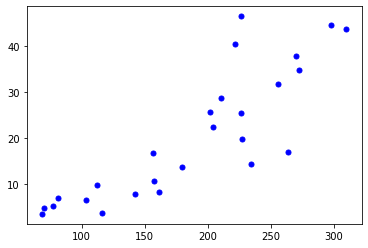

In [473]:
plt.plot( dfo['Cu-Tx'],dfo['Zarr0,25_m'], 'b.', label='CU TX Real',markersize=10)